In [1]:
import pandas as pd
import numpy as np
#reading the final pre processed csv
final = pd.read_csv("Final2015_2022.csv")
print(final.head(5))

   Unnamed: 0  season  round     driver  grid  podium  driver_points   
0           0    2015      1   hamilton     1       1              0  \
1           1    2015      1    rosberg     2       2              0   
2           3    2015      1      massa     3       4              0   
3           2    2015      1     vettel     4       3              0   
4          11    2015      1  raikkonen     5      12              0   

   driver_wins  driver_standings_pos  constructor_points  ...   
0            0                     0                   0  ...  \
1            0                     0                   0  ...   
2            0                     0                   0  ...   
3            0                     0                   0  ...   
4            0                     0                   0  ...   

   constructor_lotus_f1  constructor_manor  constructor_mclaren   
0                 False              False                False  \
1                 False              False

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

X = final.drop(['driver', 'podium'], axis = 1)
Y = final['podium']
#splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)
# Initialize and fit the preprocessing scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)
#logistic regression
log = LogisticRegression(penalty = 'l2',solver='liblinear', max_iter = 10000)
log.fit(X_train_scaled, y_train)
y_train_pred =log.predict(X_train_scaled)
y_test_pred =log.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain MSE:", train_mse)
print("\nTest MSE:", test_mse)
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTrain R-squared:", train_r2)
print("\nTest R-squared:", test_r2)


Train MSE: 28.064235391628678

Test MSE: 31.60430463576159

Train R-squared: 0.19034422922203342

Test R-squared: 0.07108531113902661


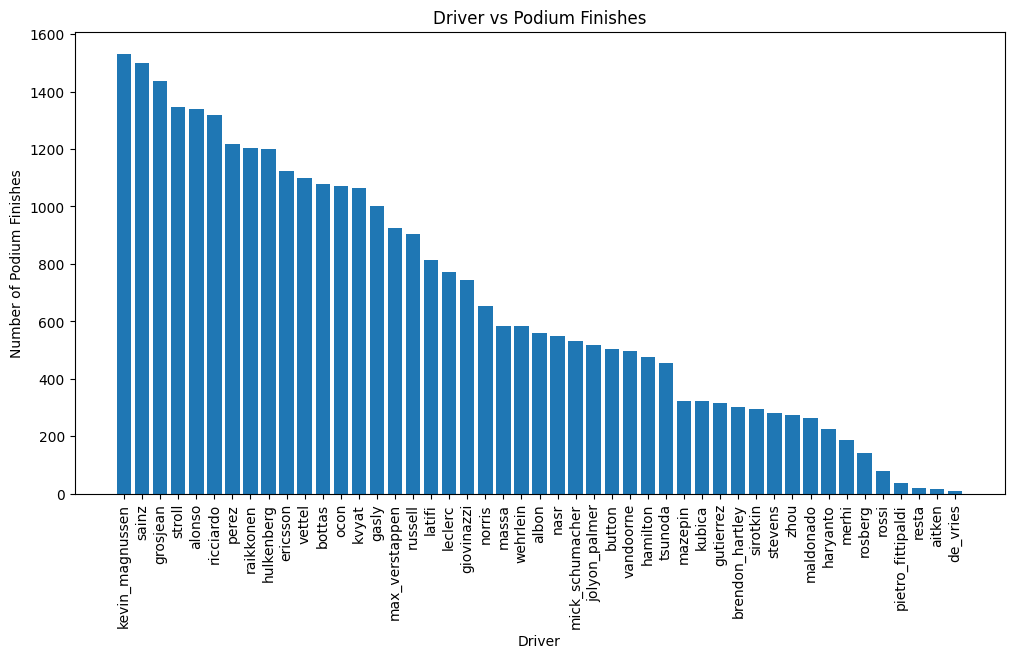

In [5]:
#driver vs podium graph

import matplotlib.pyplot as plt

# Grouping the data by 'driver' and calculating the number of podium finishes for each driver
driver_podium_counts = final.groupby('driver')['podium'].sum()
# Sorting the drivers based on the number of podium finishes in descending order
driver_podium_counts = driver_podium_counts.sort_values(ascending=False)
# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(driver_podium_counts.index, driver_podium_counts.values)
plt.xlabel('Driver')
plt.ylabel('Number of Podium Finishes')
plt.title('Driver vs Podium Finishes')
plt.xticks(rotation=90)
plt.show()

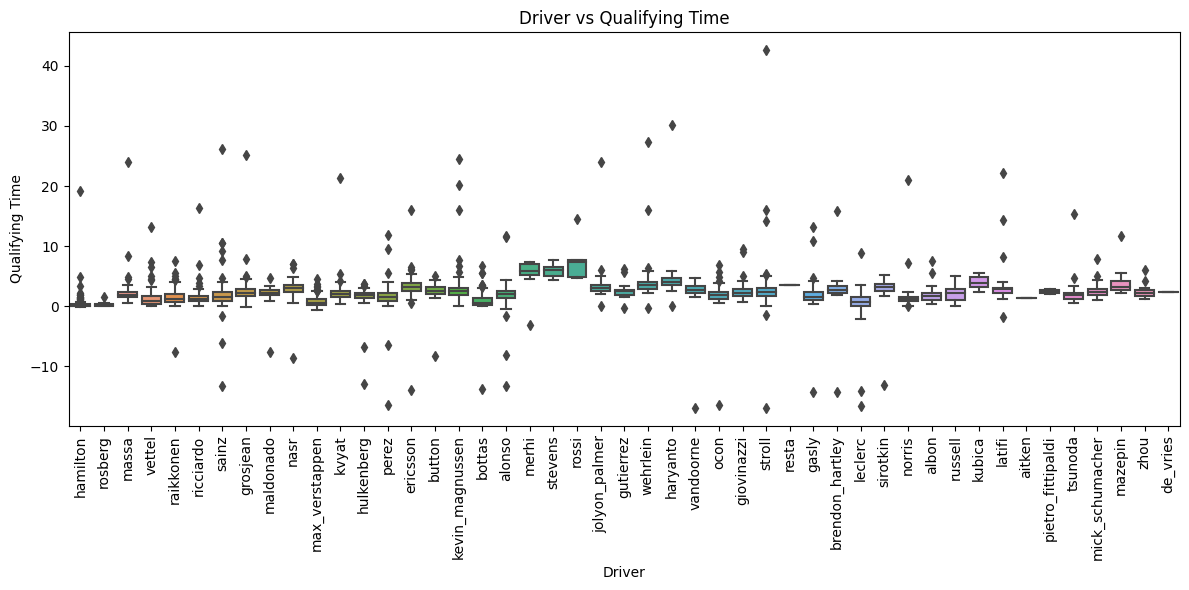

In [6]:
#driver vs qualifying time graph
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='driver', y='qualifying_time', data=final)
plt.xlabel('Driver')
plt.ylabel('Qualifying Time')
plt.title('Driver vs Qualifying Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

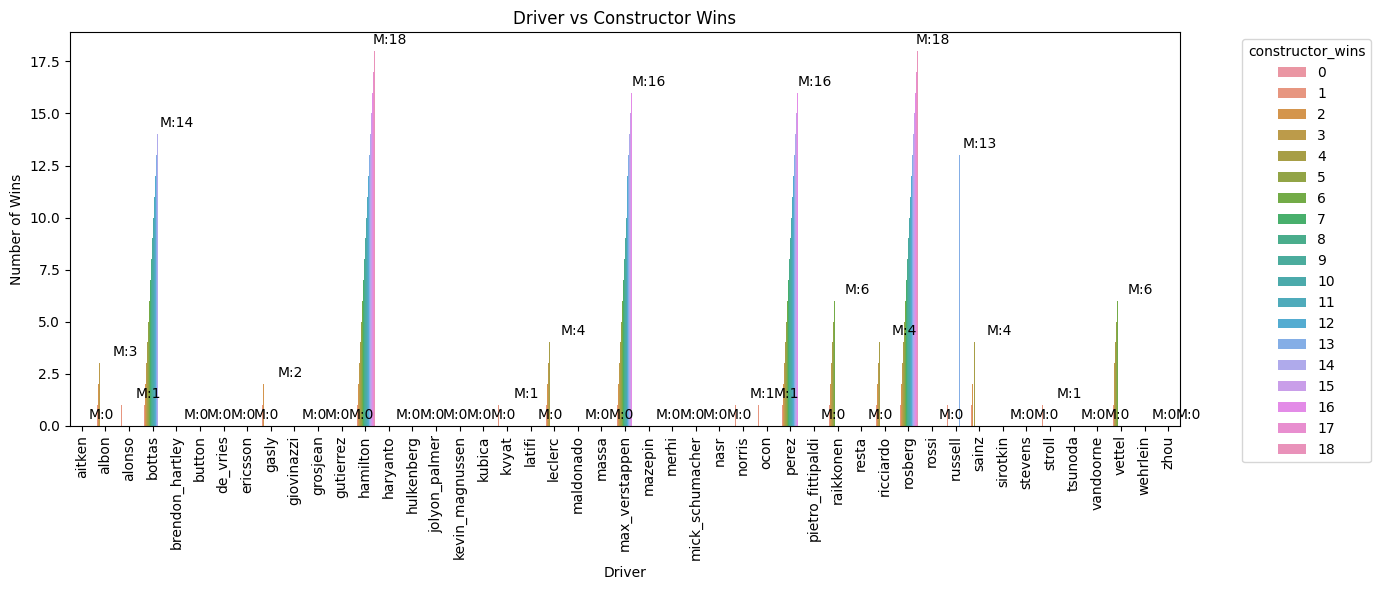

In [7]:
#driver vs constructor wins graph

# Grouping the data by 'driver' and 'constructor' and calculating the total wins for each combination
driver_constructor_wins = final.groupby(['driver', 'constructor_wins']).sum().reset_index()
# Getting the maximum number of wins for each driver
max_wins = driver_constructor_wins.groupby('driver')['constructor_wins'].max().reset_index()
# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='driver', y='constructor_wins', hue='constructor_wins', data=driver_constructor_wins)
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.title('Driver vs Constructor Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='constructor_wins', bbox_to_anchor=(1.05, 1), loc='upper left')
# Annotating the maximum values
for index, row in max_wins.iterrows():
    plt.annotate(f"M:{row['constructor_wins']}", xy=(index, row['constructor_wins']), xytext=(5, 5), textcoords='offset points')
plt.show()